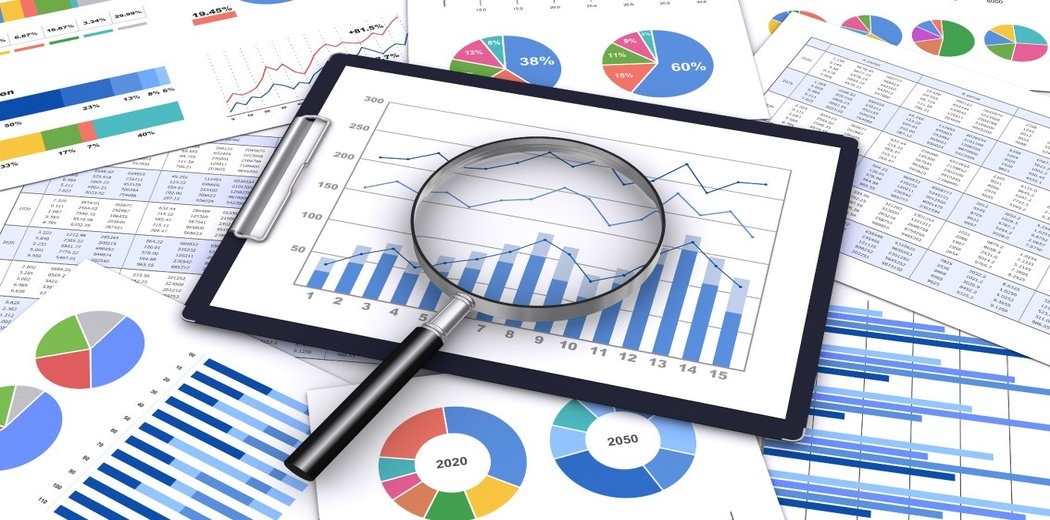

**Statistical analysis** plays a crucial role in Natural Language Processing (NLP) to extract meaningful insights, patterns, and relationships from language data. 

<div style="text-align: center; background-color: #856ff8; padding: 10px;">
    <h2 style="font-weight: bold;">OUTLINE</h2>
</div>

- Importing Various Modules
- Loading Dataset
- Statistical Analysis
  - Zipf's Law
- Statistical Analysis on Tweet Tokens
  - Top 50 Tokens in Negative Tweets
  - Top 50 Tokens in Positive Tweets
- Probability Statistics
- Probability Statistics - CDF
- Plot for Cumulative Distributive Function [ Positive vs Negative ]

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">IMPORTING VARIOUS MODULES</h2>
</div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from scipy import stats

from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore")

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">LOADING DATASET</h2>
</div>

In [2]:
# Reading the dataset with no columns titles and with latin encoding 
twitter_data = pd.read_csv('twitter_term_frequency_data.csv', encoding = "ISO-8859-1")

In [3]:
# Print bottom 5 rows in the dataframe.
twitter_data.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,word,negative,positive,total
0,aa,45,23,68
1,aaa,23,12,35
2,aaaa,10,6,16
3,aaaaa,5,3,8
4,aaaaaa,4,5,9


In [4]:
df = twitter_data.sort_values(by='total', ascending=False)
df = df.reset_index(drop=True)

In [5]:
# Print bottom 5 rows in the dataframe.
df.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,word,negative,positive,total
0,to,78026,63169,141195
1,the,64676,66278,130954
2,my,48048,31387,79435
3,it,39520,36896,76416
4,and,38529,37495,76024


In [6]:
# Print the shape of the DataFrame
print("The shape of data frame:", df.shape)
# Print the length (number of rows) of the DataFrame
print("Number of Rows in the dataframe:", len(df))
# Print the number of columns in the DataFrame
print("Number of Columns in the dataframe:", len(df.columns))

The shape of data frame: (118312, 4)
Number of Rows in the dataframe: 118312
Number of Columns in the dataframe: 4


In [7]:
twitter_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118312 entries, 0 to 118311
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   word      118310 non-null  object
 1   negative  118312 non-null  int64 
 2   positive  118312 non-null  int64 
 3   total     118312 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 3.6+ MB


<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">STATISTICAL ANALYSIS</h2>
</div>

<br>
<span style="color: yellow; background-color: black; font-weight: bold; padding: 5px; font-size: 32px;"> Zipfs Law </span>
</br>

Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.: the rank-frequency distribution is an inverse relation.

Suppose a word occurs f times and that in the list of word frequencies it has a certain rank, r. Then if Zipf's Law holds we have

$f = a/r^{b}$

where a and b are constants and $b ≈ 1$.

Let's see how the tweet tokens and their frequencies look on a plot

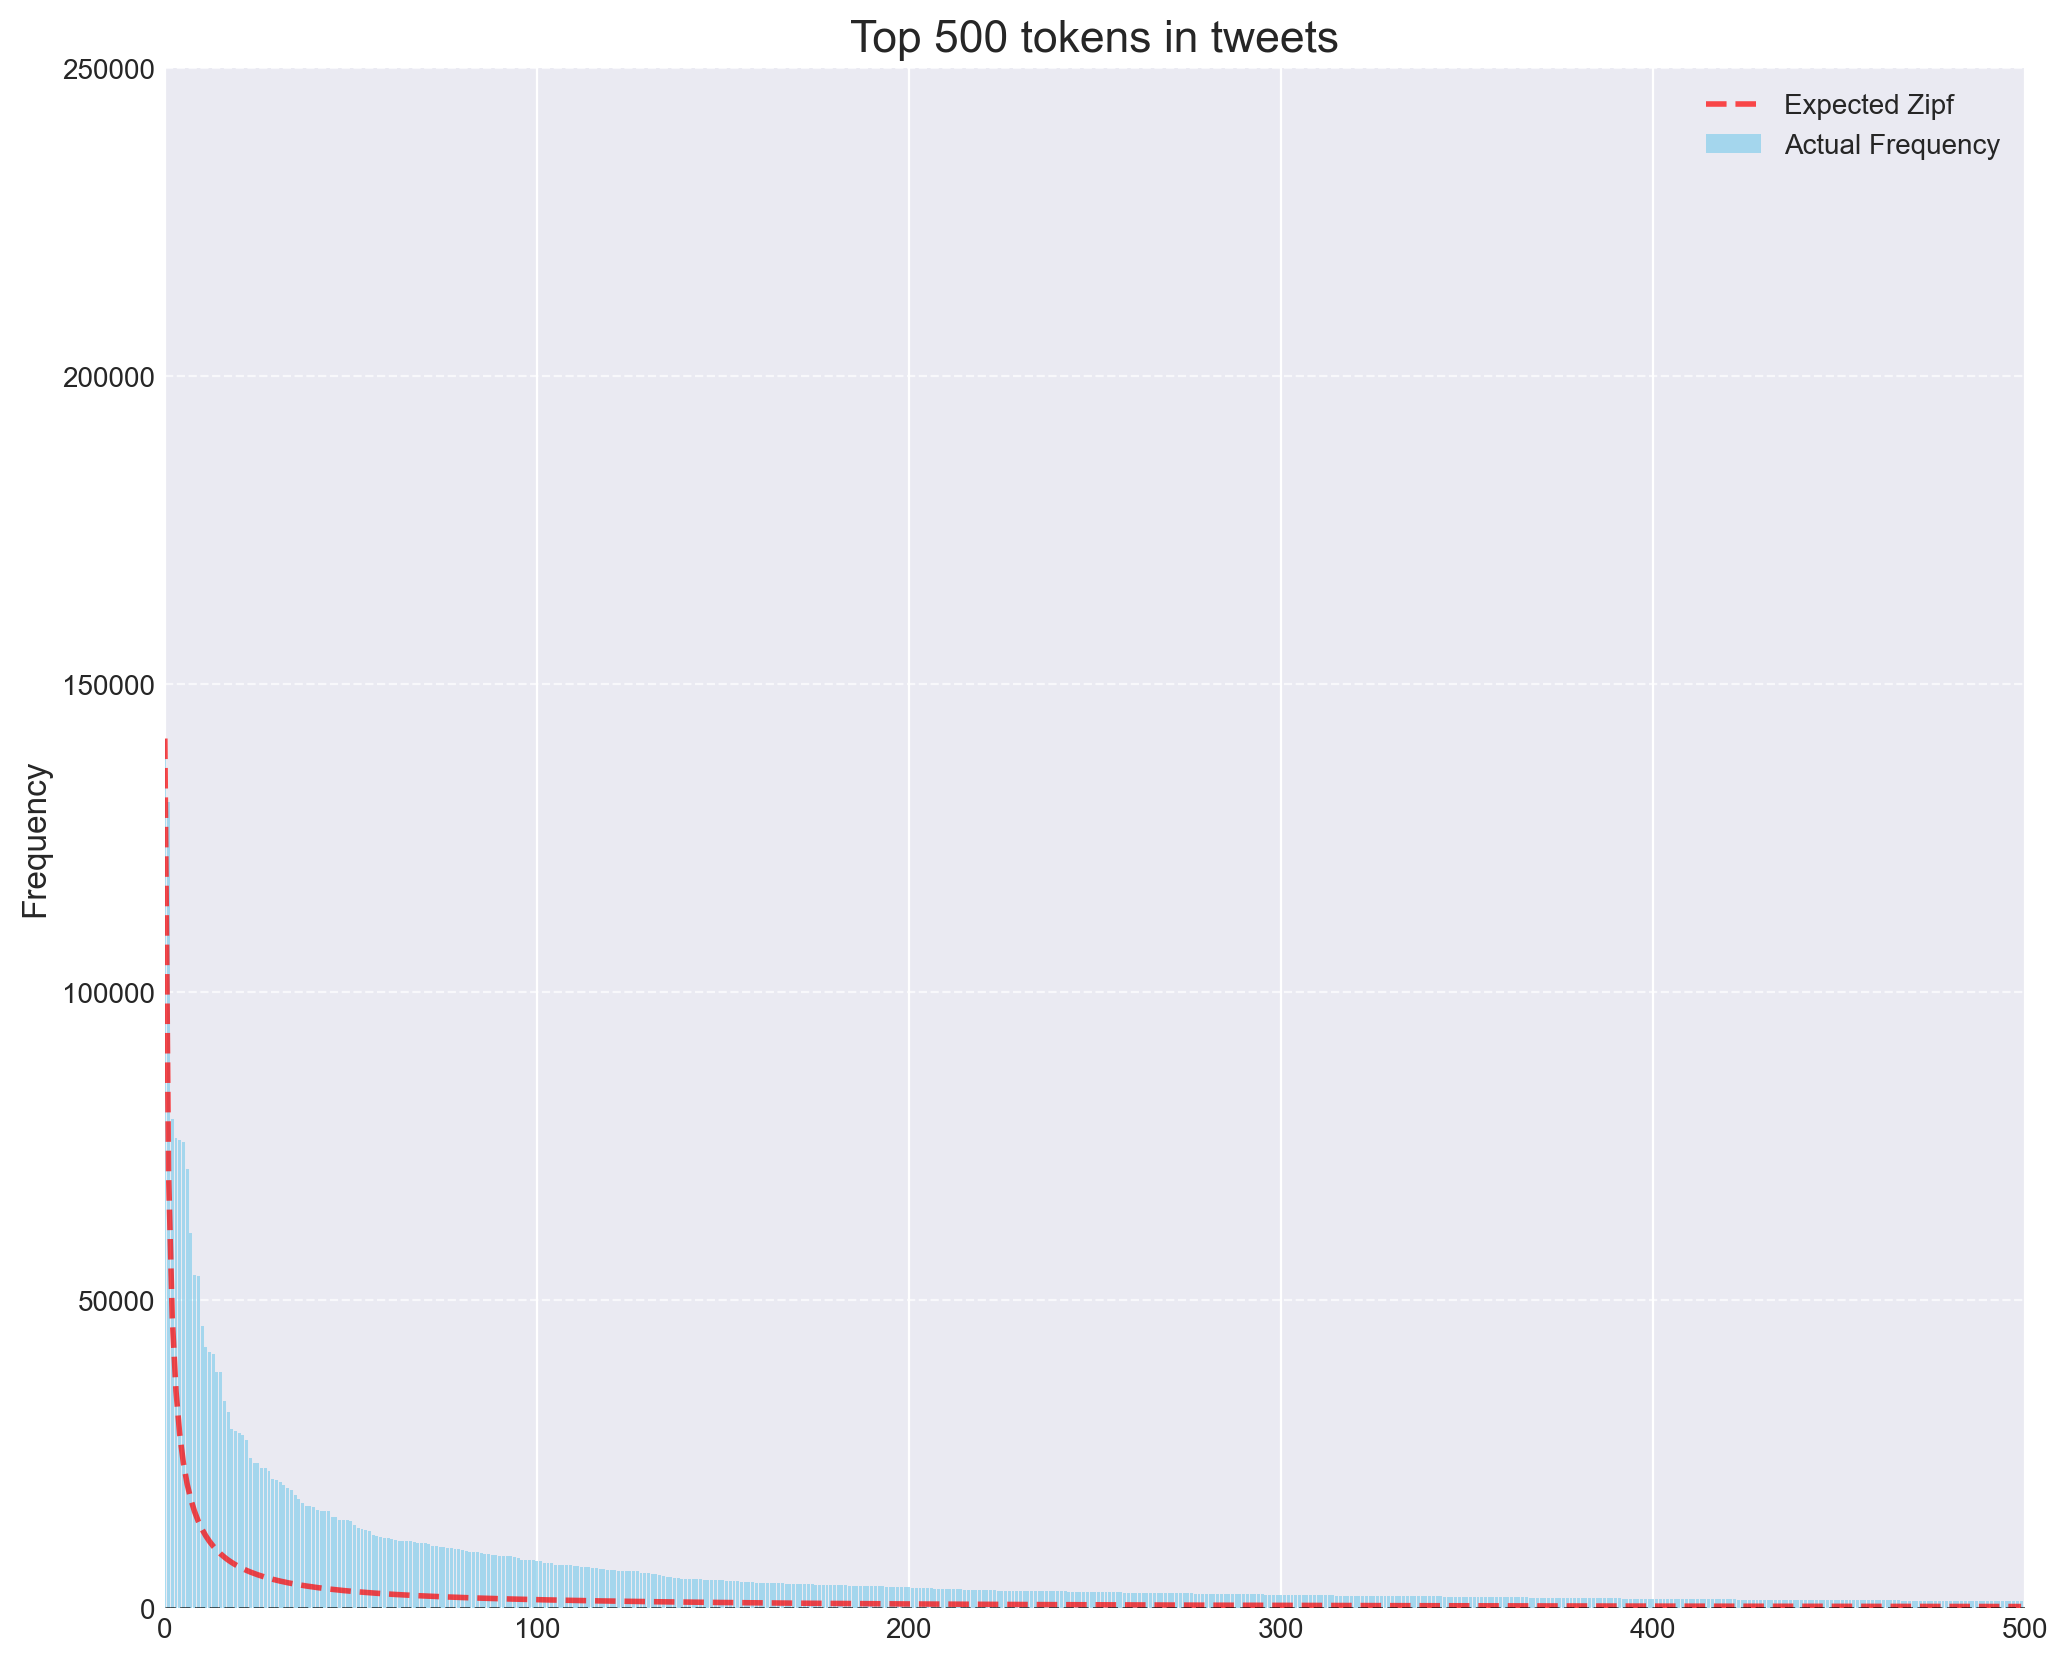

In [8]:
plt.style.use('seaborn-darkgrid')  # Change the style to seaborn-darkgrid for a cleaner look
y_pos = np.arange(500)

fig, ax = plt.subplots(figsize=(12, 10))

expected_zipf = [df['total'][0] / (i + 1) for i in y_pos]
ax.plot(y_pos, expected_zipf, color='r', linestyle='--', linewidth=2, alpha=0.7, label='Expected Zipf')

bars = ax.bar(y_pos, df['total'][:500], alpha=0.7, color='skyblue', label='Actual Frequency')

ax.set_xlim(0, 500)
ax.set_ylim(0, 250000)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Top 500 tokens in tweets', fontsize=16)
ax.legend()

# Adding grid lines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a horizontal line at y=0 for better reference
ax.axhline(y=0, color='black', linewidth=1, linestyle='--', alpha=0.7)

plt.show()

On the X-axis are the top 500 tokens of the corpus with the highest rank in the left and 500th rank in the right. Y-axis consists of the frequencies of the top 500 words most frequent words in the Sentiment140 corpus.
The curve here is not the exact Zipfian curve, rather a near Zipfian distribution curve.

Even though we can see the plot follows the trend of Zipf’s Law, but it looks like it has more area above the expected Zipf curve in higher ranked words.

We can also plot a log-log graph, with X-axis being log(rank), Y-axis being log(frequency). By plotting, the result will be a roughly linear line.

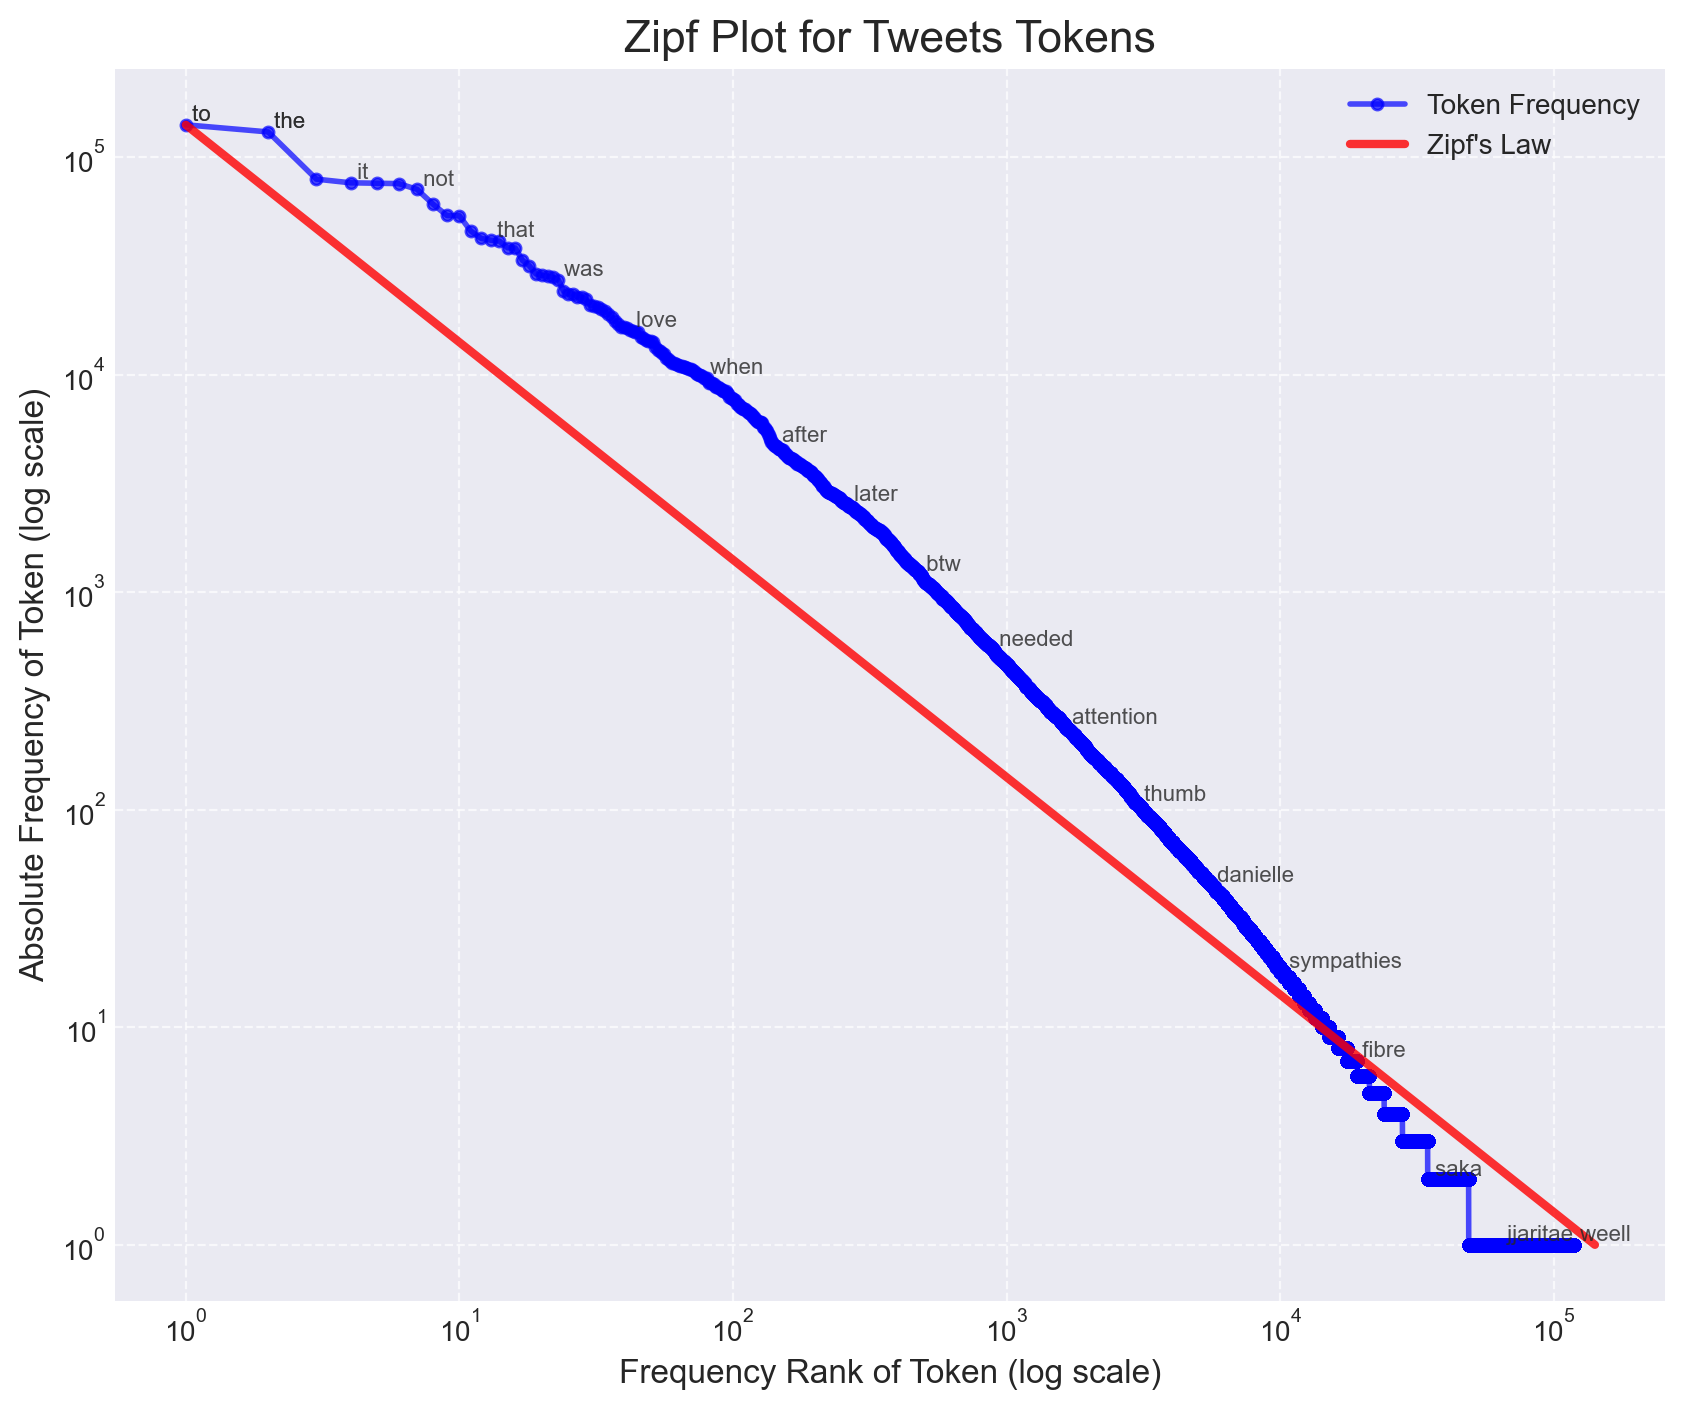

In [9]:
plt.style.use('seaborn-darkgrid')  # Change the style to seaborn-darkgrid for a cleaner look

counts = df['total']
tokens = df['word']
ranks = np.arange(1, len(counts) + 1)
indices = np.argsort(-counts)
frequencies = counts[indices]

plt.figure(figsize=(10, 8))

plt.loglog(ranks, frequencies, marker=".", color='b', markersize=8, linewidth=2, alpha=0.7, label='Token Frequency')
plt.plot([1, frequencies[0]], [frequencies[0], 1], color='r', linewidth=3, alpha=0.8, label='Zipf\'s Law')

plt.title("Zipf Plot for Tweets Tokens", fontsize=16)
plt.xlabel("Frequency Rank of Token (log scale)", fontsize=12)
plt.ylabel("Absolute Frequency of Token (log scale)", fontsize=12)

for n in list(np.logspace(-0.5, np.log10(len(counts) - 2), 22).astype(int)):
    plt.text(ranks[n], frequencies[n], " " + tokens[indices[n]],
             verticalalignment="bottom", horizontalalignment="left", fontsize=8, alpha=0.8)

# Adding legend and grid lines for better readability
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

Here, we see a roughly linear curve, but deviating above the expected line on higher ranked words and deviating below the expected line on lower ranked words.

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">STATISTICAL ANALYSIS ON TWEET TOKENS</h2>
</div>

In [10]:
# Reading the dataset with no columns titles and with latin encoding 
twitter_data_cleaned = pd.read_csv('twitter_sentiment_data_cleaned.csv', encoding = "ISO-8859-1")

In [11]:
# As the data has no column titles, we will add our own
twitter_data_cleaned.columns = ['sentiment', 'text']

In [12]:
# Show the first 5 rows of the dataframe.
twitter_data_cleaned.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,sentiment,text
0,4,is lookin ward to a long weekend really dont want to go to work day tho x
1,4,myweakness is music and i live to meet the people who make it
2,4,figured out the internet on my new ipod
3,4,can not wait to worship with you guys tonight it ll be so much fun
4,4,congrats james i m sure the book is going to be a huge success


In [13]:
# Print bottom 5 rows in the dataframe.
twitter_data_cleaned.tail().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,sentiment,text
399995,0,that is he does not know i tweet and i would like keep it that way sorry bad wife
399996,0,huh what
399997,0,only thing is im broke
399998,0,wish i could work from home today nothing will be going on here
399999,0,i miss you too i was so worried well today s my last day of school b the break glad u feel better love you


In [14]:
twitter_data_cleaned.dropna(inplace=True)

In [15]:
twitter_data_cleaned['sentiment'] = twitter_data_cleaned['sentiment'].map({0:0,4:1})

In [16]:
vect = CountVectorizer(stop_words='english', max_features=10000)

In [17]:
vect.fit(twitter_data_cleaned['text']) #Tokenise and build models

CountVectorizer(max_features=10000, stop_words='english')

In [18]:
#Encode document
neg_matrix = vect.transform(twitter_data_cleaned[twitter_data_cleaned.sentiment==0].text)
pos_matrix = vect.transform(twitter_data_cleaned[twitter_data_cleaned.sentiment==1].text)

In [19]:
neg_tf = np.sum(neg_matrix, axis=0)
pos_tf = np.sum(pos_matrix, axis=0)

In [20]:
#Remove single-dimensional entries from the shape of an array
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))

In [21]:
term_freq_df = pd.DataFrame([neg, pos], columns = vect.get_feature_names()).transpose()

In [22]:
term_freq_df.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,0,1
aa,45,23
aaa,23,12
aaaah,26,14
aaaand,11,7
aaah,42,36


In [23]:
len(term_freq_df)

10000

In [24]:
term_freq_df.columns = ['negative', 'positive']

In [25]:
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']

In [26]:
term_freq_df.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,negative,positive,total
aa,45,23,68
aaa,23,12,35
aaaah,26,14,40
aaaand,11,7,18
aaah,42,36,78


<br>
<span style="color: red; background-color: black; font-weight: bold; padding: 5px; font-size: 32px;"> Top 50 Tokens in Negative Tweets </span>
</br>

Let's see the top 50 words in negative tweets on a bar chart.

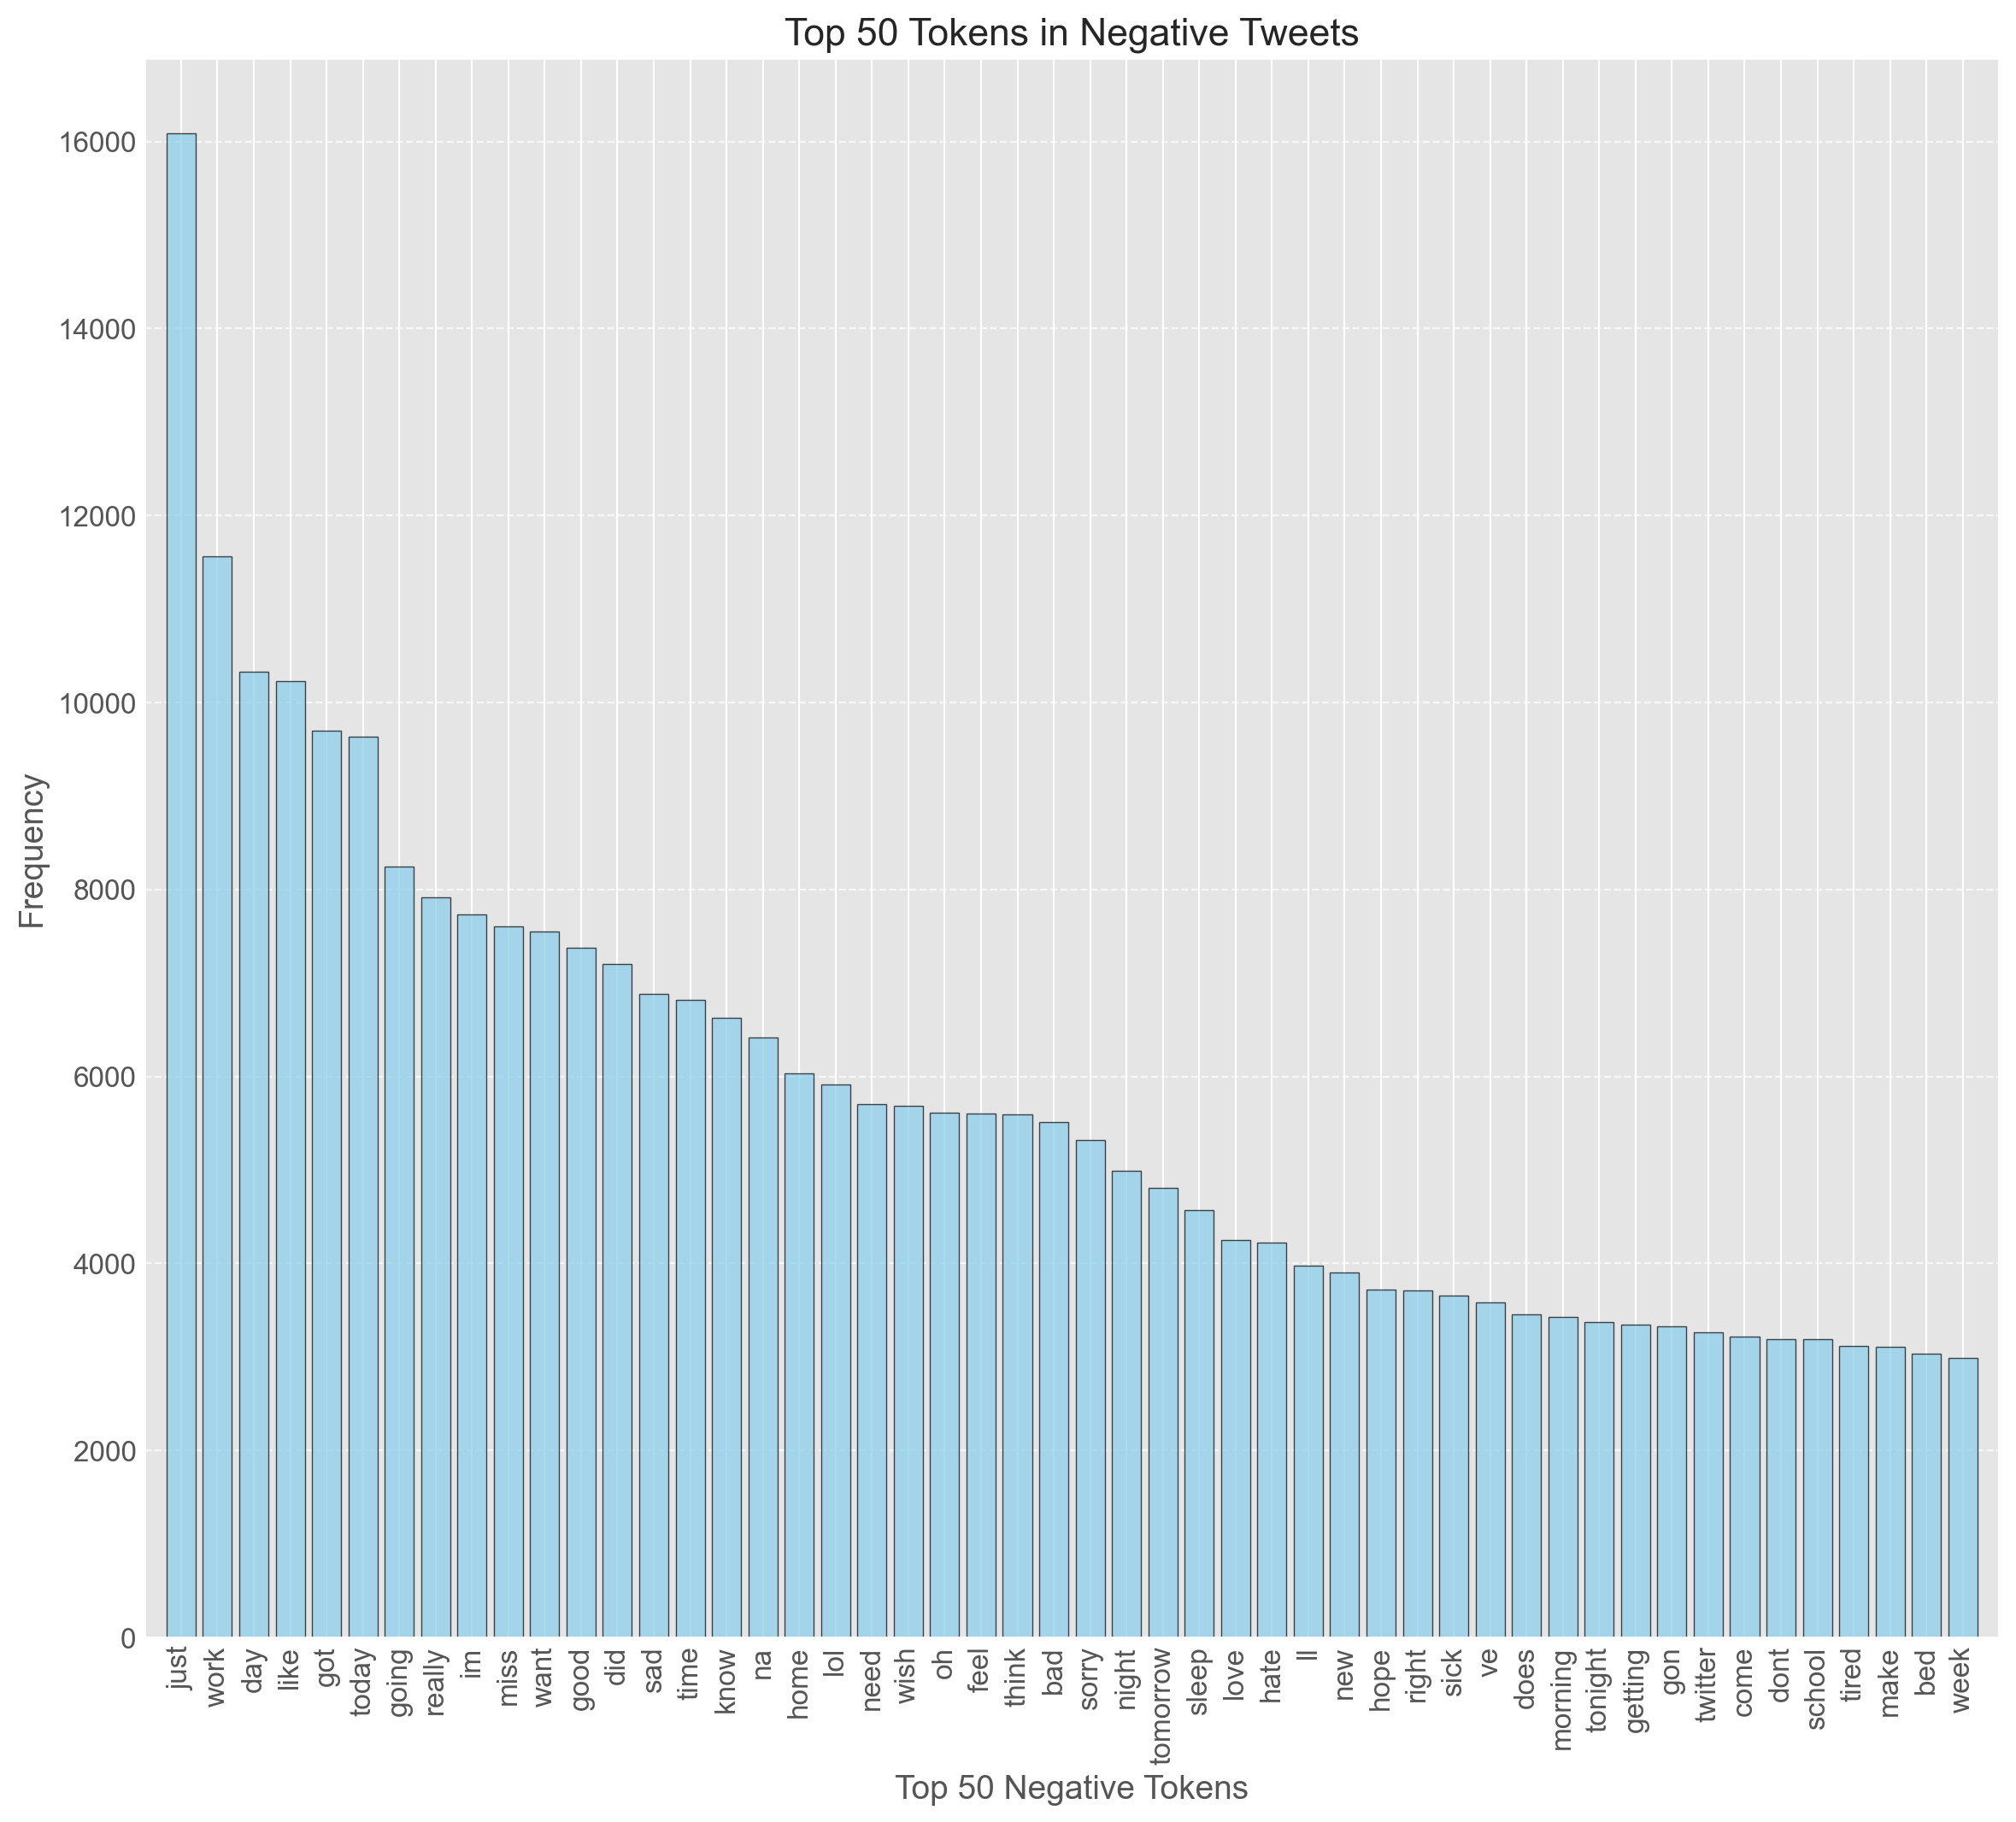

In [27]:
plt.style.use('ggplot')

# Sort the DataFrame
neg_df = term_freq_df.sort_values(by='negative', ascending=False)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(14, 12))

# Bar plot
bars = ax.bar(np.arange(50), neg_df['negative'][:50], alpha=0.7, color='skyblue', align='center', edgecolor='black')

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Set x-axis limits
ax.set_xlim(-1, 50)

# Set x-axis labels and rotate them for better readability
ax.set_xticks(np.arange(50))
ax.set_xticklabels(neg_df['negative'][:50].index, rotation='vertical')

# Increase tick label size
ax.tick_params(axis='both', labelsize=12)

# Set labels and title
ax.set_xlabel('Top 50 Negative Tokens', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Top 50 Tokens in Negative Tweets', fontsize=16)

# Show the plot
plt.show()

<br>
<span style="color: lightgreen; background-color: black; font-weight: bold; padding: 5px; font-size: 32px;"> Top 50 Tokens in Positive Tweets </span>
</br>

The most frequent words like "just", "work", "day", "got", "today" etc. do little to convey negative sentiment. It's difficult to comment about their importance in characterising negative tweets. On the other hand, words like, "miss", "sad", bad", "sorry", "hate" etc. convey clear negative sentiment.

Let's see the top 50 words in positive tweets on a bar chart.

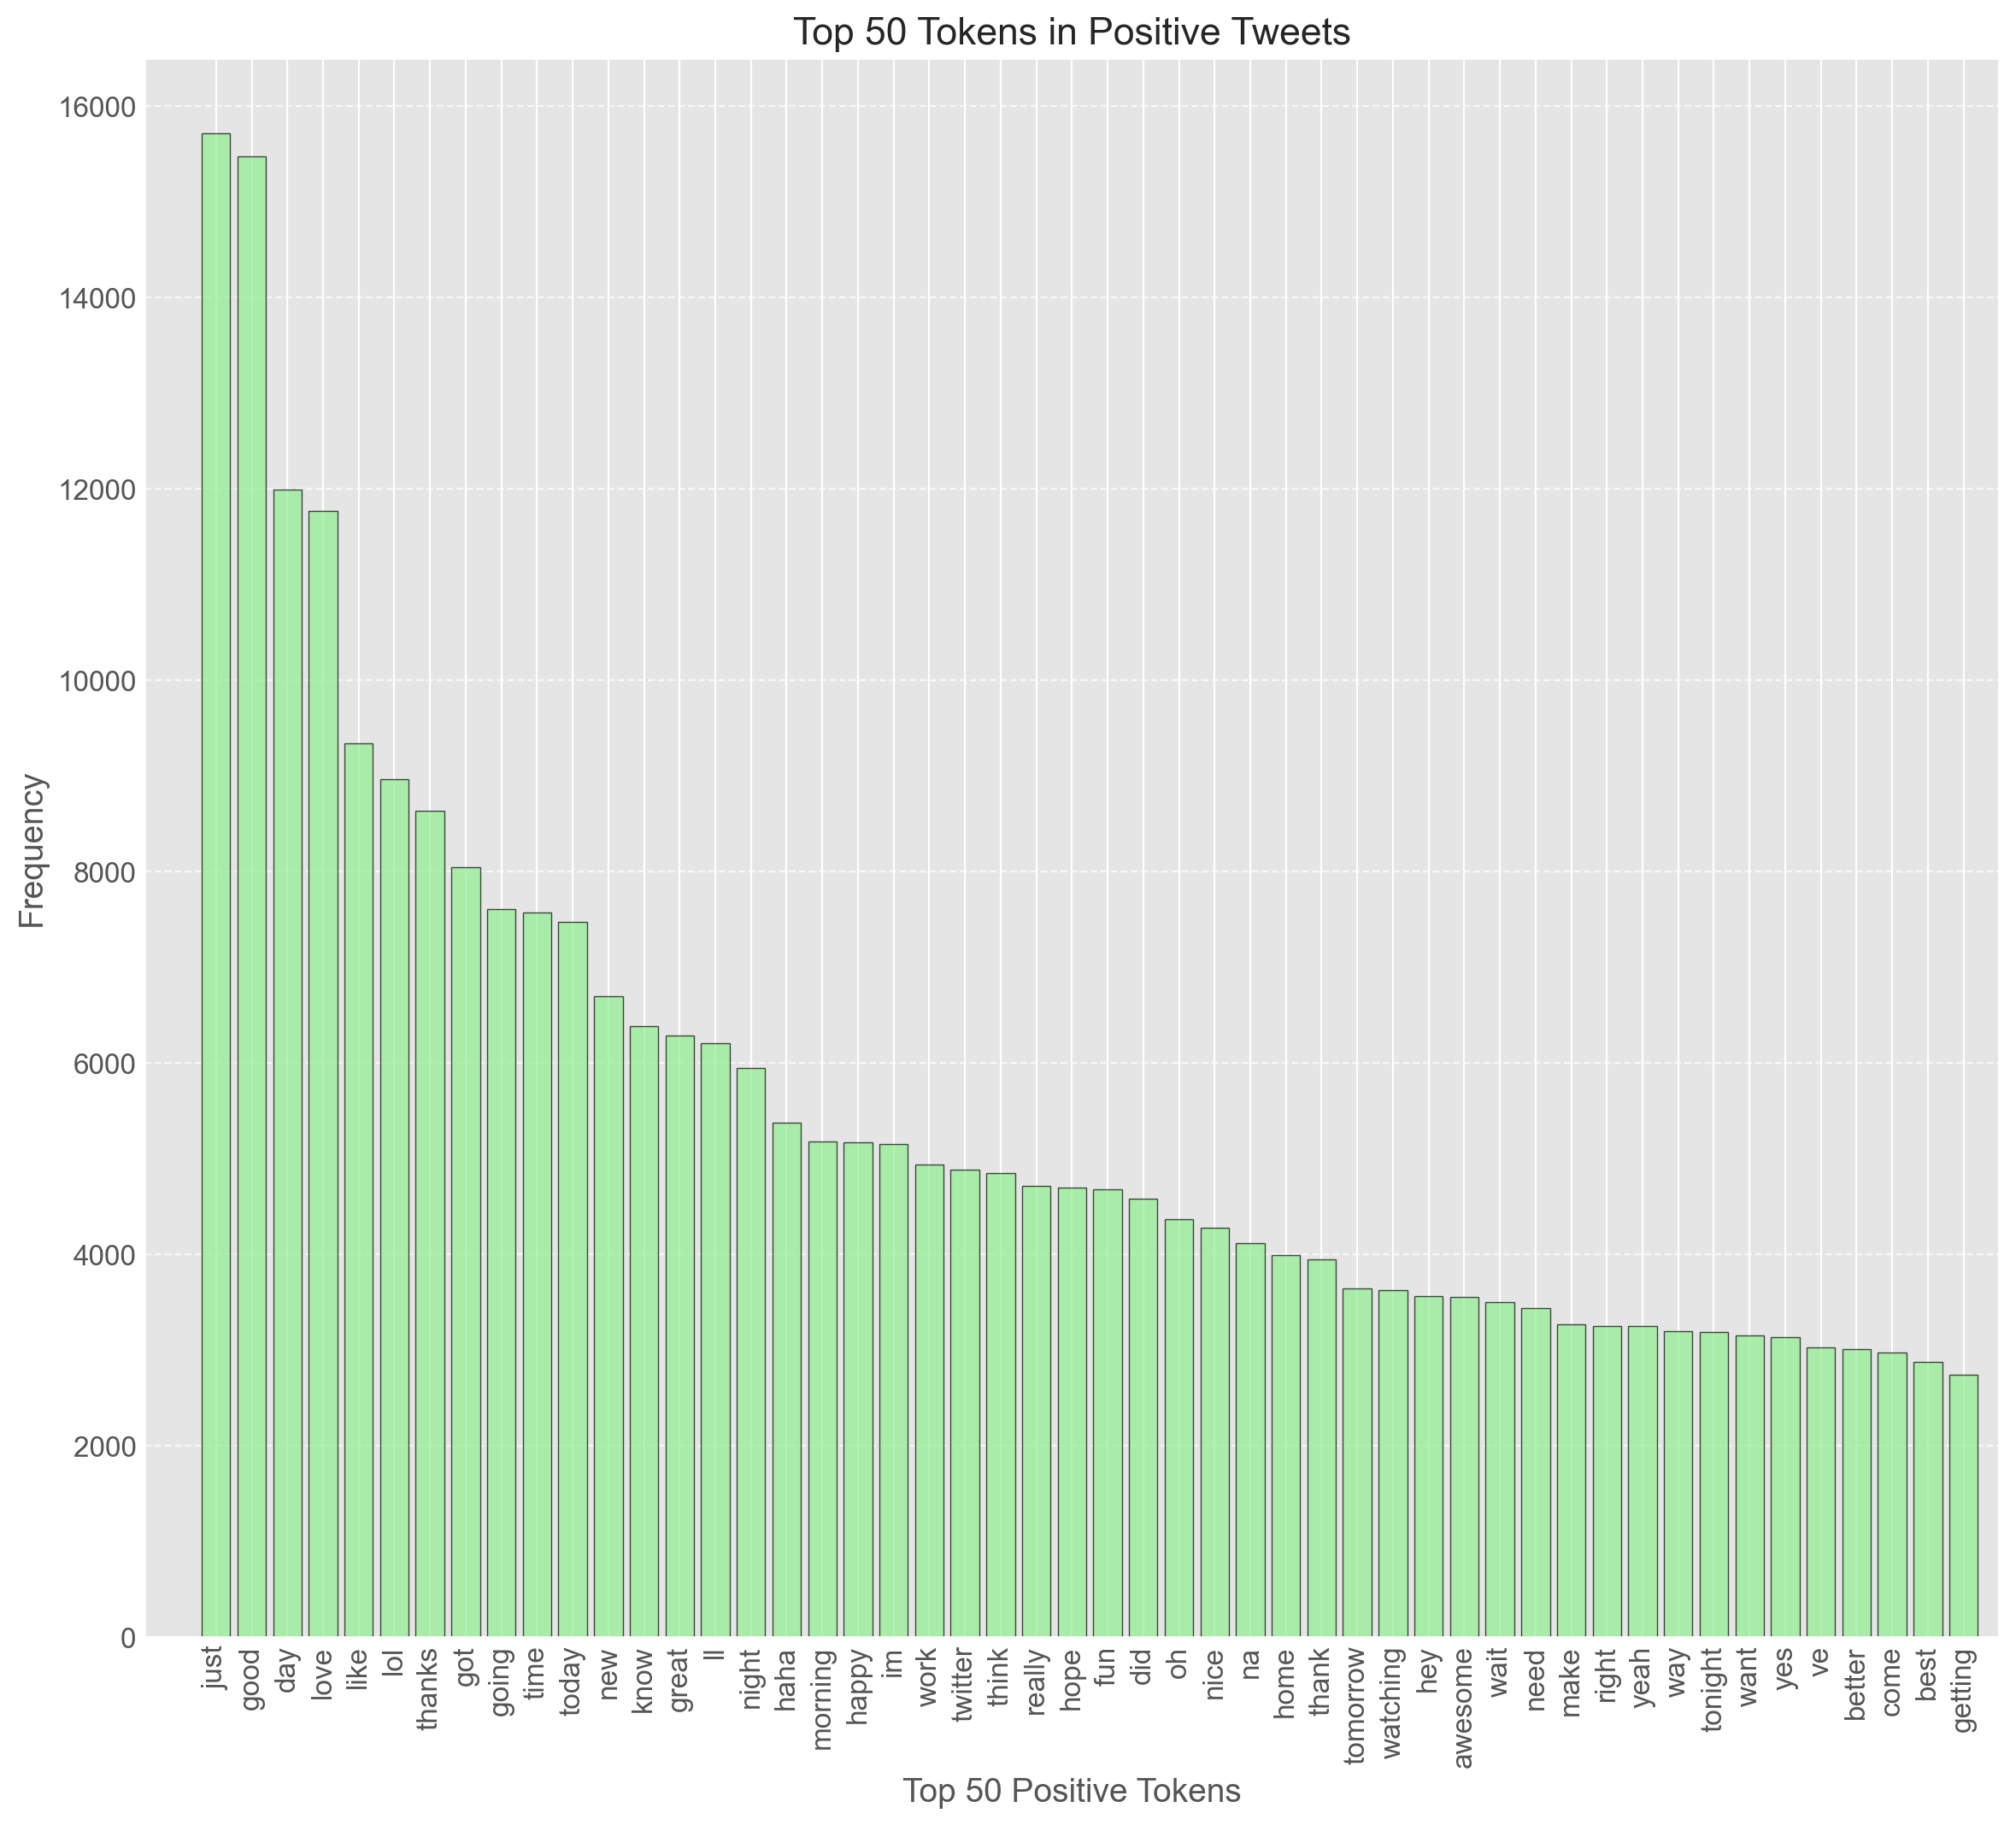

In [28]:
plt.style.use('ggplot')

# Sort the DataFrame
pos_df = term_freq_df.sort_values(by='positive', ascending=False)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(14, 12))

# Bar plot
bars = ax.bar(np.arange(50), pos_df['positive'][:50], alpha=0.7, color='lightgreen', align='center', edgecolor='black')

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Set x-axis limits
ax.set_xlim(-2, 50)

# Set x-axis labels and rotate them for better readability
ax.set_xticks(np.arange(50))
ax.set_xticklabels(pos_df['positive'][:50].index, rotation='vertical')

# Increase tick label size
ax.tick_params(axis='both', labelsize=12)

# Set labels and title
ax.set_xlabel('Top 50 Positive Tokens', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Top 50 Tokens in Positive Tweets', fontsize=16)

# Show the plot
plt.show()

The most frequent words like "just", "day", "got", "today", "time" etc. do little to convey positive sentiment. It's difficult to comment about their importance in characterising positive tweets. On the other hand, words like, "good", "love", "like", "thanks", "new" etc. convey clear positive sentiment.

Let's plot the negative frequency of a word on x-axis and the positive frequency on y-axis.

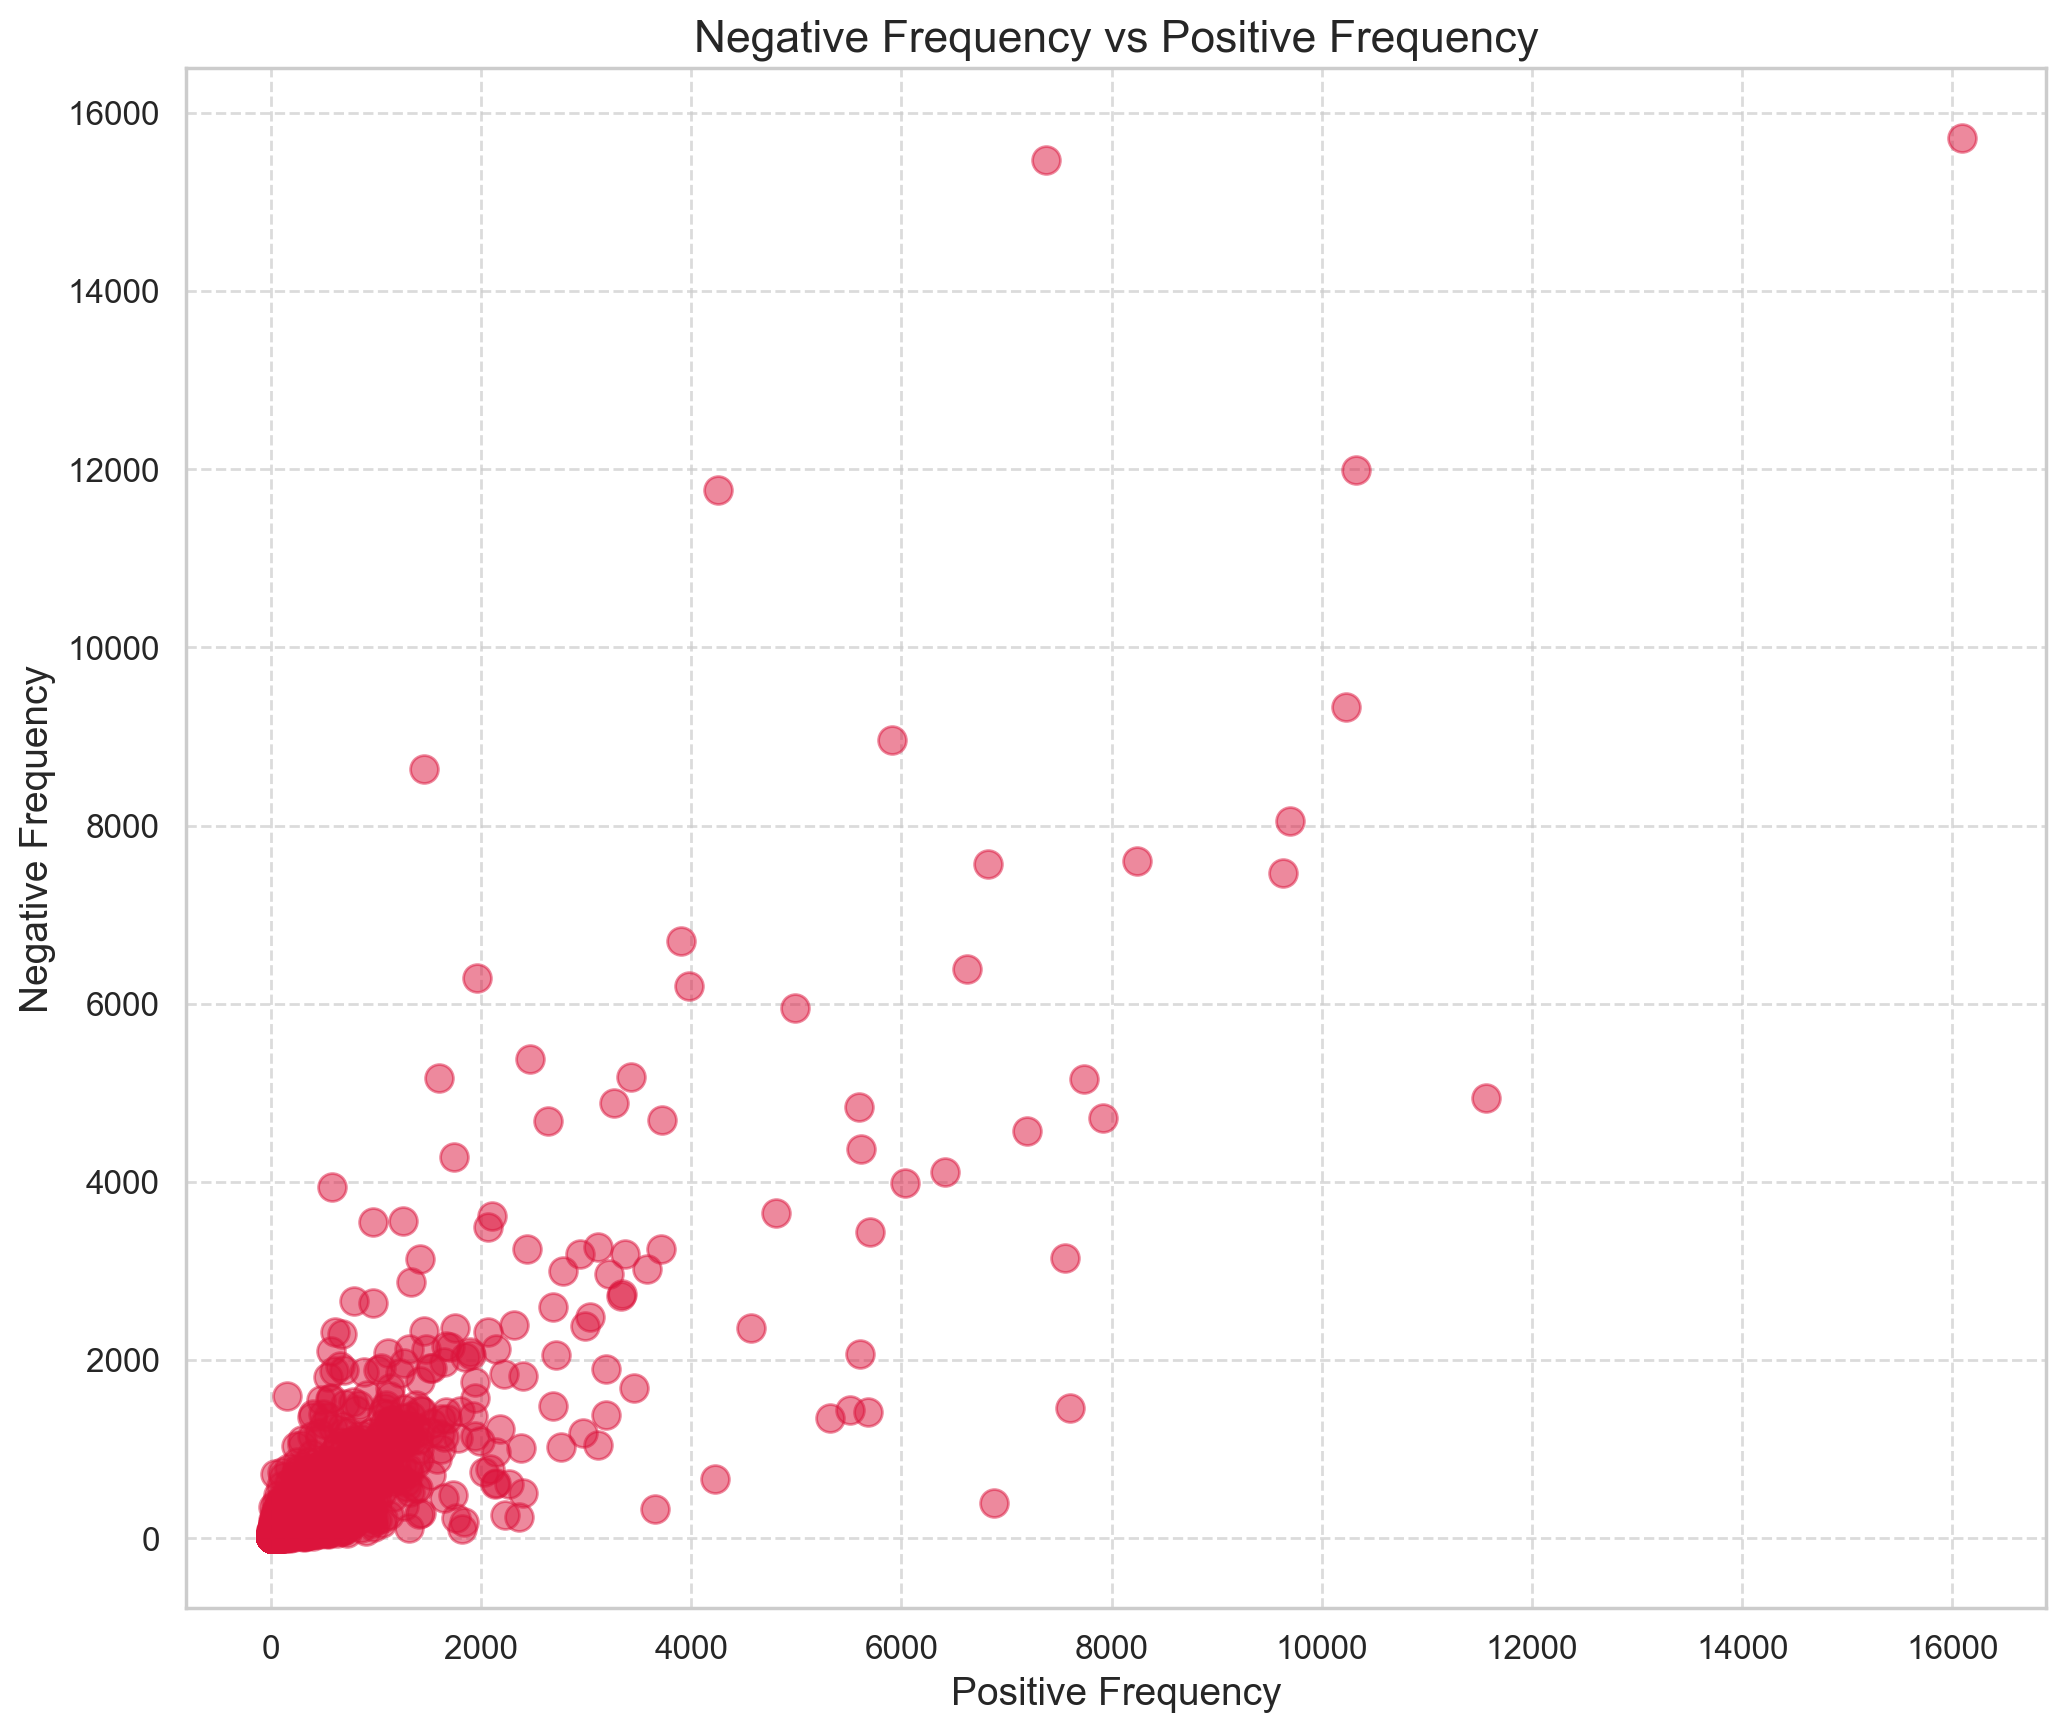

In [29]:
# Set the style
sns.set(style="whitegrid")

# Create a figure and axes
plt.figure(figsize=(12, 10))
ax = sns.regplot(x='negative', y='positive', data=term_freq_df, fit_reg=False, color='crimson', scatter_kws={'alpha':0.5, 's':100})

# Add a title
plt.title("Negative Frequency vs Positive Frequency", fontsize=16)

# Customize axes labels
plt.xlabel("Positive Frequency", fontsize=14)
plt.ylabel("Negative Frequency", fontsize=14)

# Increase tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">PROBABILITY STATISTICS</h2>
</div>

If a word appears more in one class as compared to the other, we can use it as a measure of how much important the word is to characterise the class. Let's call it posrate.

$$
posrate = \frac{positive frequency}{positive frequency + negative frequency}
$$


In [30]:
term_freq_df['posrate'] = term_freq_df['positive']/term_freq_df['total']

In [31]:
term_freq_df.sort_values(by='posrate', ascending=False).head(10).style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,negative,positive,total,posrate
recommends,0,30,30,1.000000
dividends,0,23,23,1.000000
shaunjumpnow,0,67,67,1.000000
emailunlimited,0,23,23,1.000000
fuzzball,0,22,22,1.000000
delongeday,0,37,37,1.000000
mileymonday,0,30,30,1.000000
honored,1,40,41,0.975610
hotwords,1,29,30,0.966667
shareholder,1,22,23,0.956522


Words with highest posrate have 0 frequency in negative class. But the frequency of these words is quite low to use them as a measure to characterise positive tweets.

Another metric is the frequency a word occurs in the class. This is defined as

$$
posfreq = \frac{positive frequency}{Σpositive frequency}
$$

In [32]:
term_freq_df['posfreq'] = term_freq_df['positive']/term_freq_df['positive'].sum()

In [33]:
term_freq_df.sort_values(by='posfreq', ascending=False).head(10).style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,negative,positive,total,posrate,posfreq
just,16088,15714,31802,0.494120,0.014240
good,7373,15475,22848,0.677302,0.014023
day,10330,11992,22322,0.537228,0.010867
love,4254,11769,16023,0.734507,0.010665
like,10230,9335,19565,0.477128,0.008459
lol,5911,8961,14872,0.602542,0.008120
thanks,1462,8631,10093,0.855147,0.007821
got,9700,8048,17748,0.453460,0.007293
going,8242,7607,15849,0.479967,0.006893
time,6821,7571,14392,0.526056,0.006861


In [34]:
term_freq_df['posfreq'].max()

0.014240015949107846

In [35]:
term_freq_df['posfreq'].min()

0.0

In [36]:
term_freq_df['posrate'].max()

1.0

Hence, instead of arithmetic mean, we use harmonic mean. It increases the effect of the small values and reduces the effect of the larger ones. The harmonic mean H of positive real numbers x1, x2,...... xn is defined as

$$
H = \frac{n}{Σ_{i=1}^{n}\frac{1}{x_{i}}}
$$

In [37]:
term_freq_df['pos_hmean'] = term_freq_df.apply(lambda x: (stats.hmean([x['posrate'], x['posfreq']])
                                          if x['posrate']>0 and x['posfreq']>0 else 0), axis=1)

In [38]:
term_freq_df.sort_values(by='pos_hmean', ascending=False).head(10).style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,negative,positive,total,posrate,posfreq,pos_hmean
just,16088,15714,31802,0.494120,0.014240,0.027682
good,7373,15475,22848,0.677302,0.014023,0.027478
day,10330,11992,22322,0.537228,0.010867,0.021303
love,4254,11769,16023,0.734507,0.010665,0.021025
like,10230,9335,19565,0.477128,0.008459,0.016624
lol,5911,8961,14872,0.602542,0.008120,0.016025
thanks,1462,8631,10093,0.855147,0.007821,0.015501
got,9700,8048,17748,0.453460,0.007293,0.014355
going,8242,7607,15849,0.479967,0.006893,0.013592
time,6821,7571,14392,0.526056,0.006861,0.013545


The harmonic mean rank seems just like the posfreq rank. Here, the impact of the posfreq significantly increased and dominated the mean value. Hence, we still can't come to a meaningful conclusion.

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">PROBABILITY STATISTICS - CDF </h2>
</div>

Now, we will try the Cumulative Disbrituion Function. The cumulative distribution function (CDF) of a real-valued random variable X, evaluated at x, is the probability that X will take a value less than or equal to x. Now, we do calculate harmonic mean of these 2 CDF values. 

In [39]:
def normcdf(x):
    #x is variable, x.mean() is mean and x.std() is standard deviation
    return stats.norm.cdf(x, x.mean(), x.std())

In [40]:
term_freq_df['posrate_cdf'] = normcdf(term_freq_df['posrate'])

In [41]:
term_freq_df['posfreq_cdf'] = normcdf(term_freq_df['posfreq'])

In [42]:
term_freq_df['pos_hmean_cdf'] = stats.hmean([term_freq_df['posrate_cdf'], term_freq_df['posfreq_cdf']])

In [43]:
term_freq_df.sort_values(by='pos_hmean_cdf', ascending=False).head(10).style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,negative,positive,total,posrate,posfreq,pos_hmean,posrate_cdf,posfreq_cdf,pos_hmean_cdf
welcome,154,1600,1754,0.912201,0.001450,0.002895,0.992249,0.998863,0.995545
thank,580,3946,4526,0.871852,0.003576,0.007123,0.985501,1.000000,0.992697
thanks,1462,8631,10093,0.855147,0.007821,0.015501,0.981484,1.000000,0.990656
follow,616,2314,2930,0.789761,0.002097,0.004183,0.955571,0.999997,0.977279
awesome,972,3549,4521,0.785003,0.003216,0.006406,0.952886,1.000000,0.975875
glad,578,2099,2677,0.784087,0.001902,0.003795,0.952355,0.999977,0.975585
amazing,677,2295,2972,0.772207,0.002080,0.004148,0.945019,0.999996,0.971731
yay,794,2661,3455,0.770188,0.002411,0.004808,0.943688,1.000000,0.971028
enjoy,406,1396,1802,0.774695,0.001265,0.002526,0.946625,0.995781,0.970581
hi,544,1807,2351,0.768609,0.001638,0.003268,0.942630,0.999746,0.970348


Now, we apply this calculation to the negative class of each word.

In [44]:
term_freq_df['negrate'] = term_freq_df['negative']/term_freq_df['total']
term_freq_df['negfreq'] = term_freq_df['negative']/term_freq_df['negative'].sum()
term_freq_df['neg_hmean'] = term_freq_df.apply(lambda x: (stats.hmean([x['negrate'], x['negfreq']])
                                          if x['negrate']>0 and x['negfreq']>0 else 0), axis=1)

In [45]:
term_freq_df['negrate_cdf'] = normcdf(term_freq_df['negrate'])
term_freq_df['negfreq_cdf'] = normcdf(term_freq_df['negfreq'])
term_freq_df['neg_hmean_cdf'] = stats.hmean([term_freq_df['negrate_cdf'], term_freq_df['negfreq_cdf']])

In [46]:
term_freq_df.sort_values(by='neg_hmean_cdf', ascending=False).head(10).style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,negative,positive,total,posrate,posfreq,pos_hmean,posrate_cdf,posfreq_cdf,pos_hmean_cdf,negrate,negfreq,neg_hmean,negrate_cdf,negfreq_cdf,neg_hmean_cdf
sad,6880,400,7280,0.054945,0.000362,0.000720,0.004479,0.723554,0.008904,0.945055,0.005936,0.011798,0.995521,1.000000,0.997755
hurts,1823,105,1928,0.054461,0.000095,0.000190,0.004442,0.495626,0.008806,0.945539,0.001573,0.003140,0.995558,0.999726,0.997637
sick,3657,327,3984,0.082078,0.000296,0.000591,0.007058,0.671432,0.013970,0.917922,0.003155,0.006289,0.992942,1.000000,0.996458
sucks,2365,242,2607,0.092827,0.000219,0.000438,0.008397,0.606313,0.016565,0.907173,0.002040,0.004072,0.991603,0.999997,0.995782
poor,1843,185,2028,0.091223,0.000168,0.000335,0.008184,0.560777,0.016133,0.908777,0.001590,0.003175,0.991816,0.999764,0.995774
ugh,2229,259,2488,0.104100,0.000235,0.000468,0.010037,0.619646,0.019754,0.895900,0.001923,0.003838,0.989963,0.999991,0.994952
missing,1767,227,1994,0.113842,0.000206,0.000411,0.011672,0.594443,0.022894,0.886158,0.001525,0.003044,0.988328,0.999585,0.993925
headache,1320,114,1434,0.079498,0.000103,0.000206,0.006766,0.502982,0.013353,0.920502,0.001139,0.002275,0.993234,0.992608,0.992921
hate,4227,670,4897,0.136818,0.000607,0.001209,0.016469,0.874228,0.032329,0.863182,0.003647,0.007263,0.983531,1.000000,0.991697
miss,7603,1468,9071,0.161834,0.001330,0.002639,0.023520,0.997295,0.045957,0.838166,0.006560,0.013018,0.976480,1.000000,0.988100


Plotting pos_hmean (Y-axis) vs neg_hmean (X-axis):

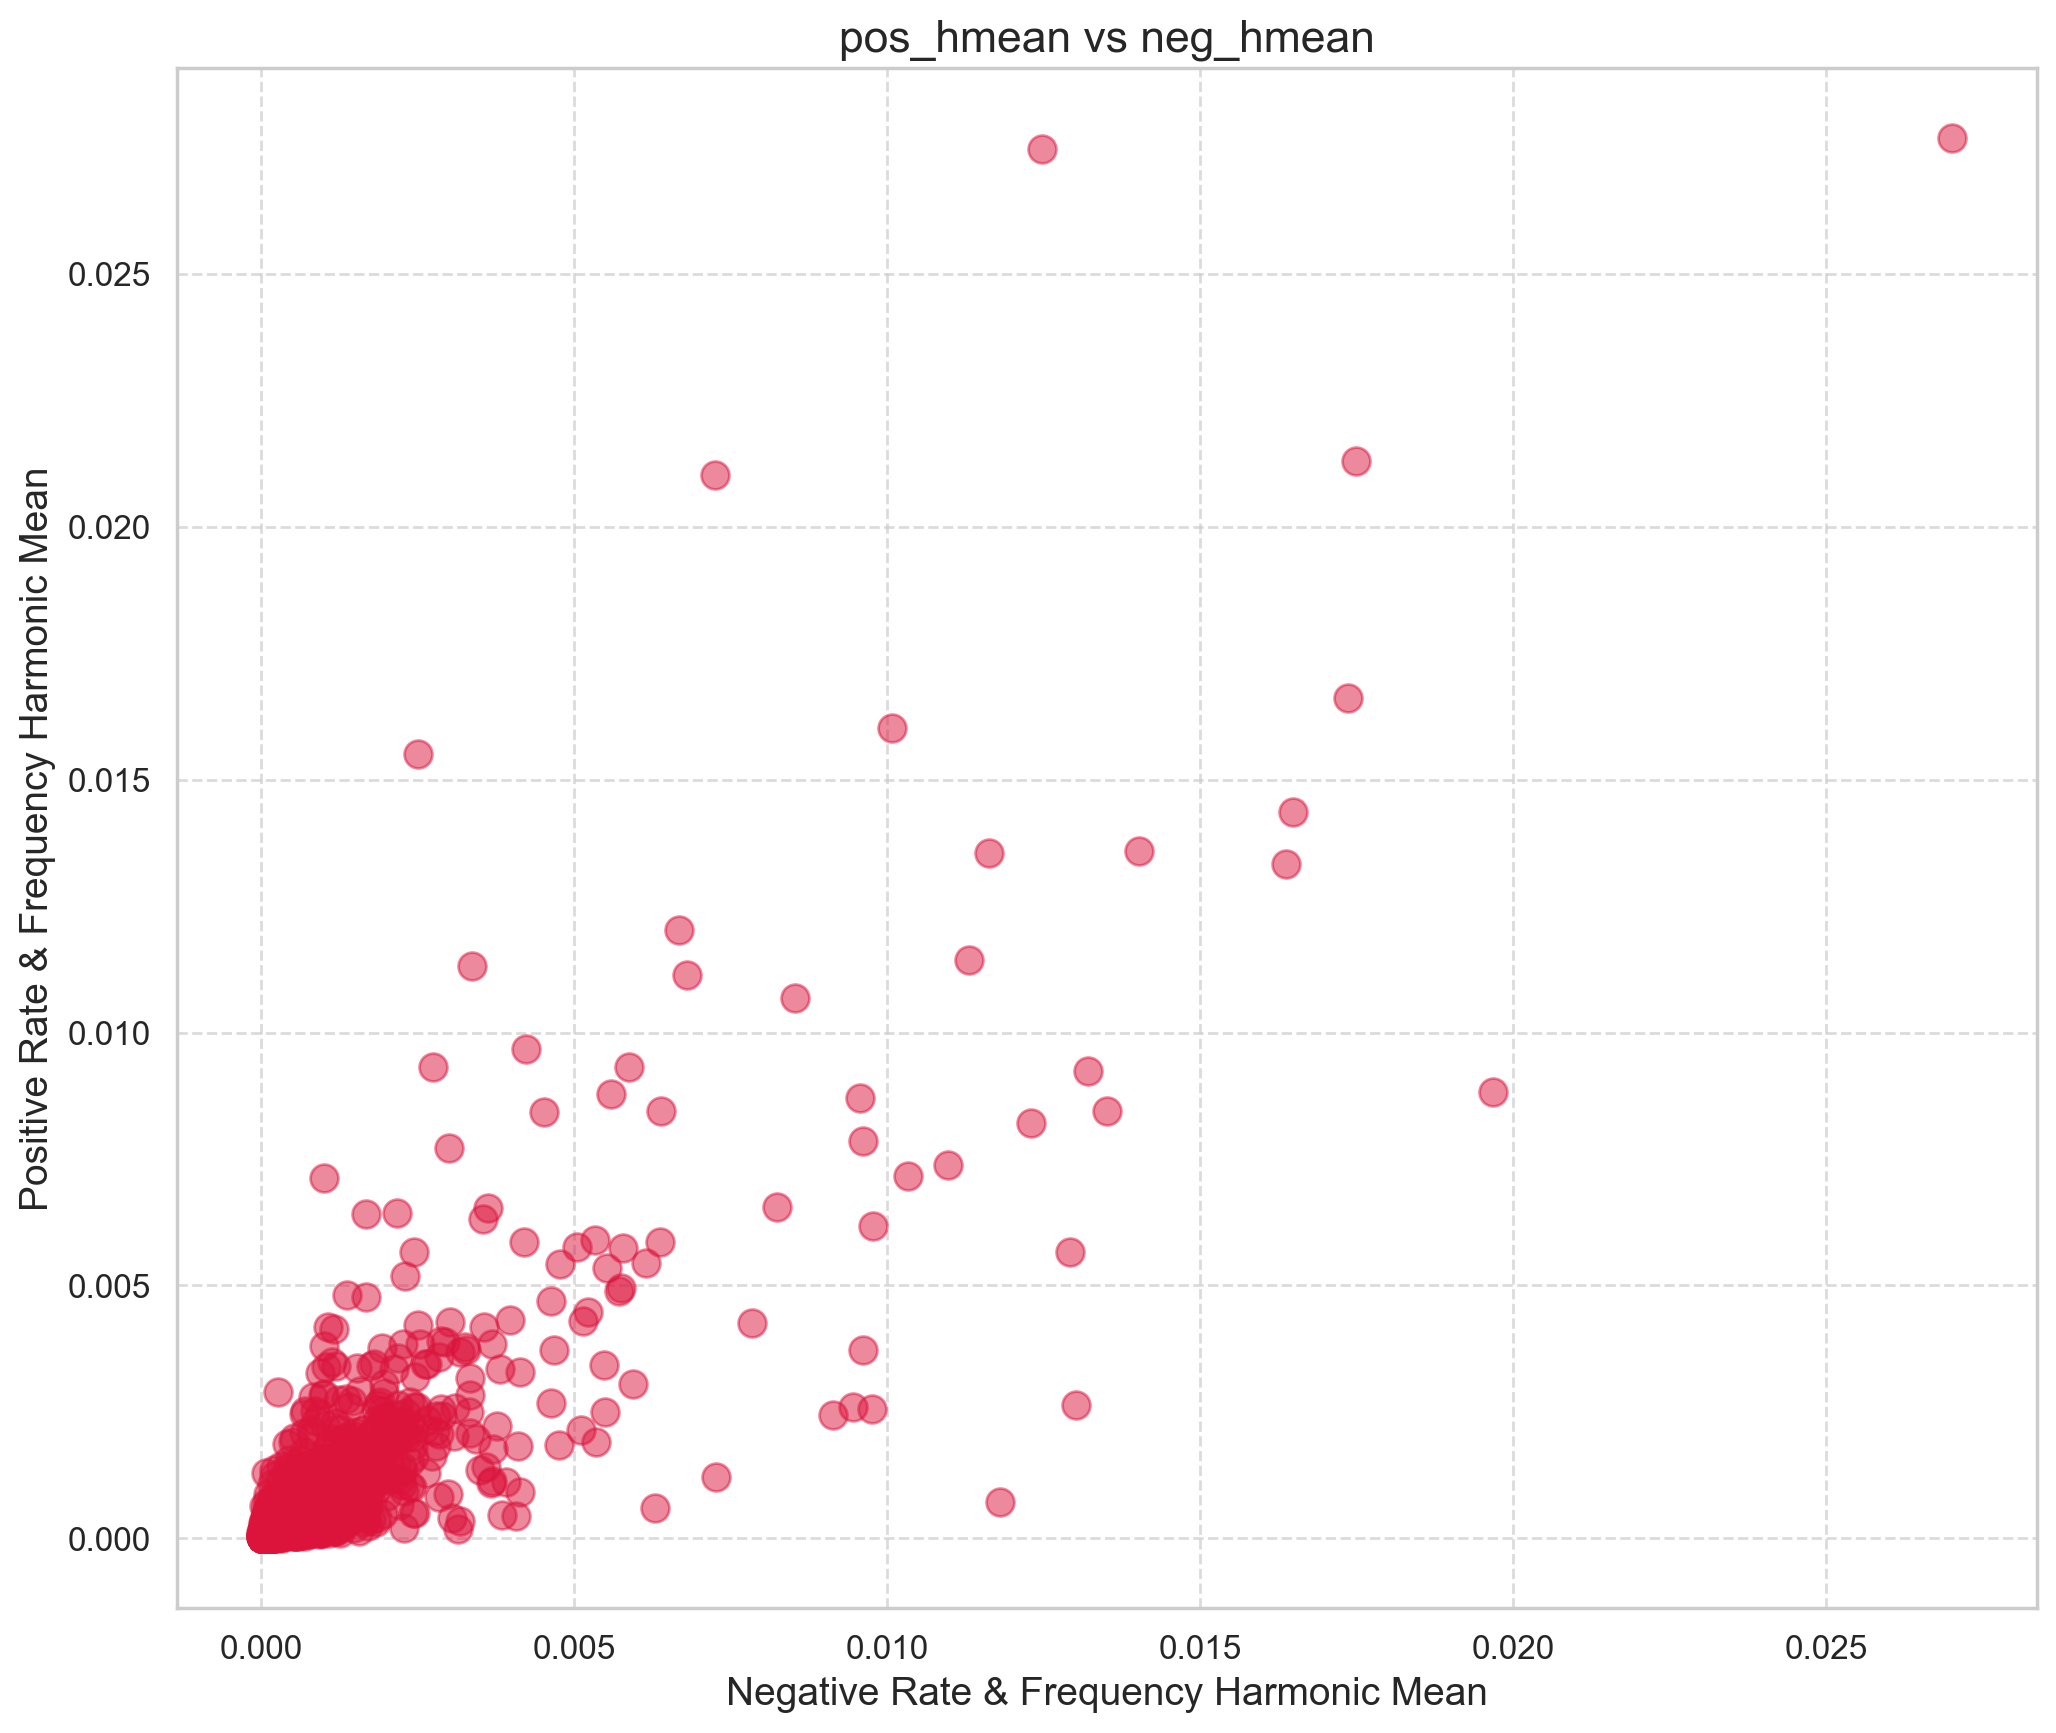

In [47]:
# Set the style
sns.set(style="whitegrid")

# Create a figure and axes
plt.figure(figsize=(12, 10))
ax = sns.regplot(x='neg_hmean', y='pos_hmean', data=term_freq_df, fit_reg=False, color='crimson', scatter_kws={'alpha':0.5, 's':100})

# Add a title
plt.title("pos_hmean vs neg_hmean", fontsize=16)

# Customize axes labels
plt.xlabel("Negative Rate & Frequency Harmonic Mean", fontsize=14)
plt.ylabel("Positive Rate & Frequency Harmonic Mean", fontsize=14)

# Increase tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

After plotting neg_hmean_cdf (X-axis) vs pos_hmean_cdf (Y-axis), we find that if a data point is near the upper left, it is more positive. And if a data point is near the bottom right, it is more negative.

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">PLOT FOR CUMULATIVE DISTRIBUTION FUNCTION [ POSITIVE VS NEGATIVE ]</h2>
</div>

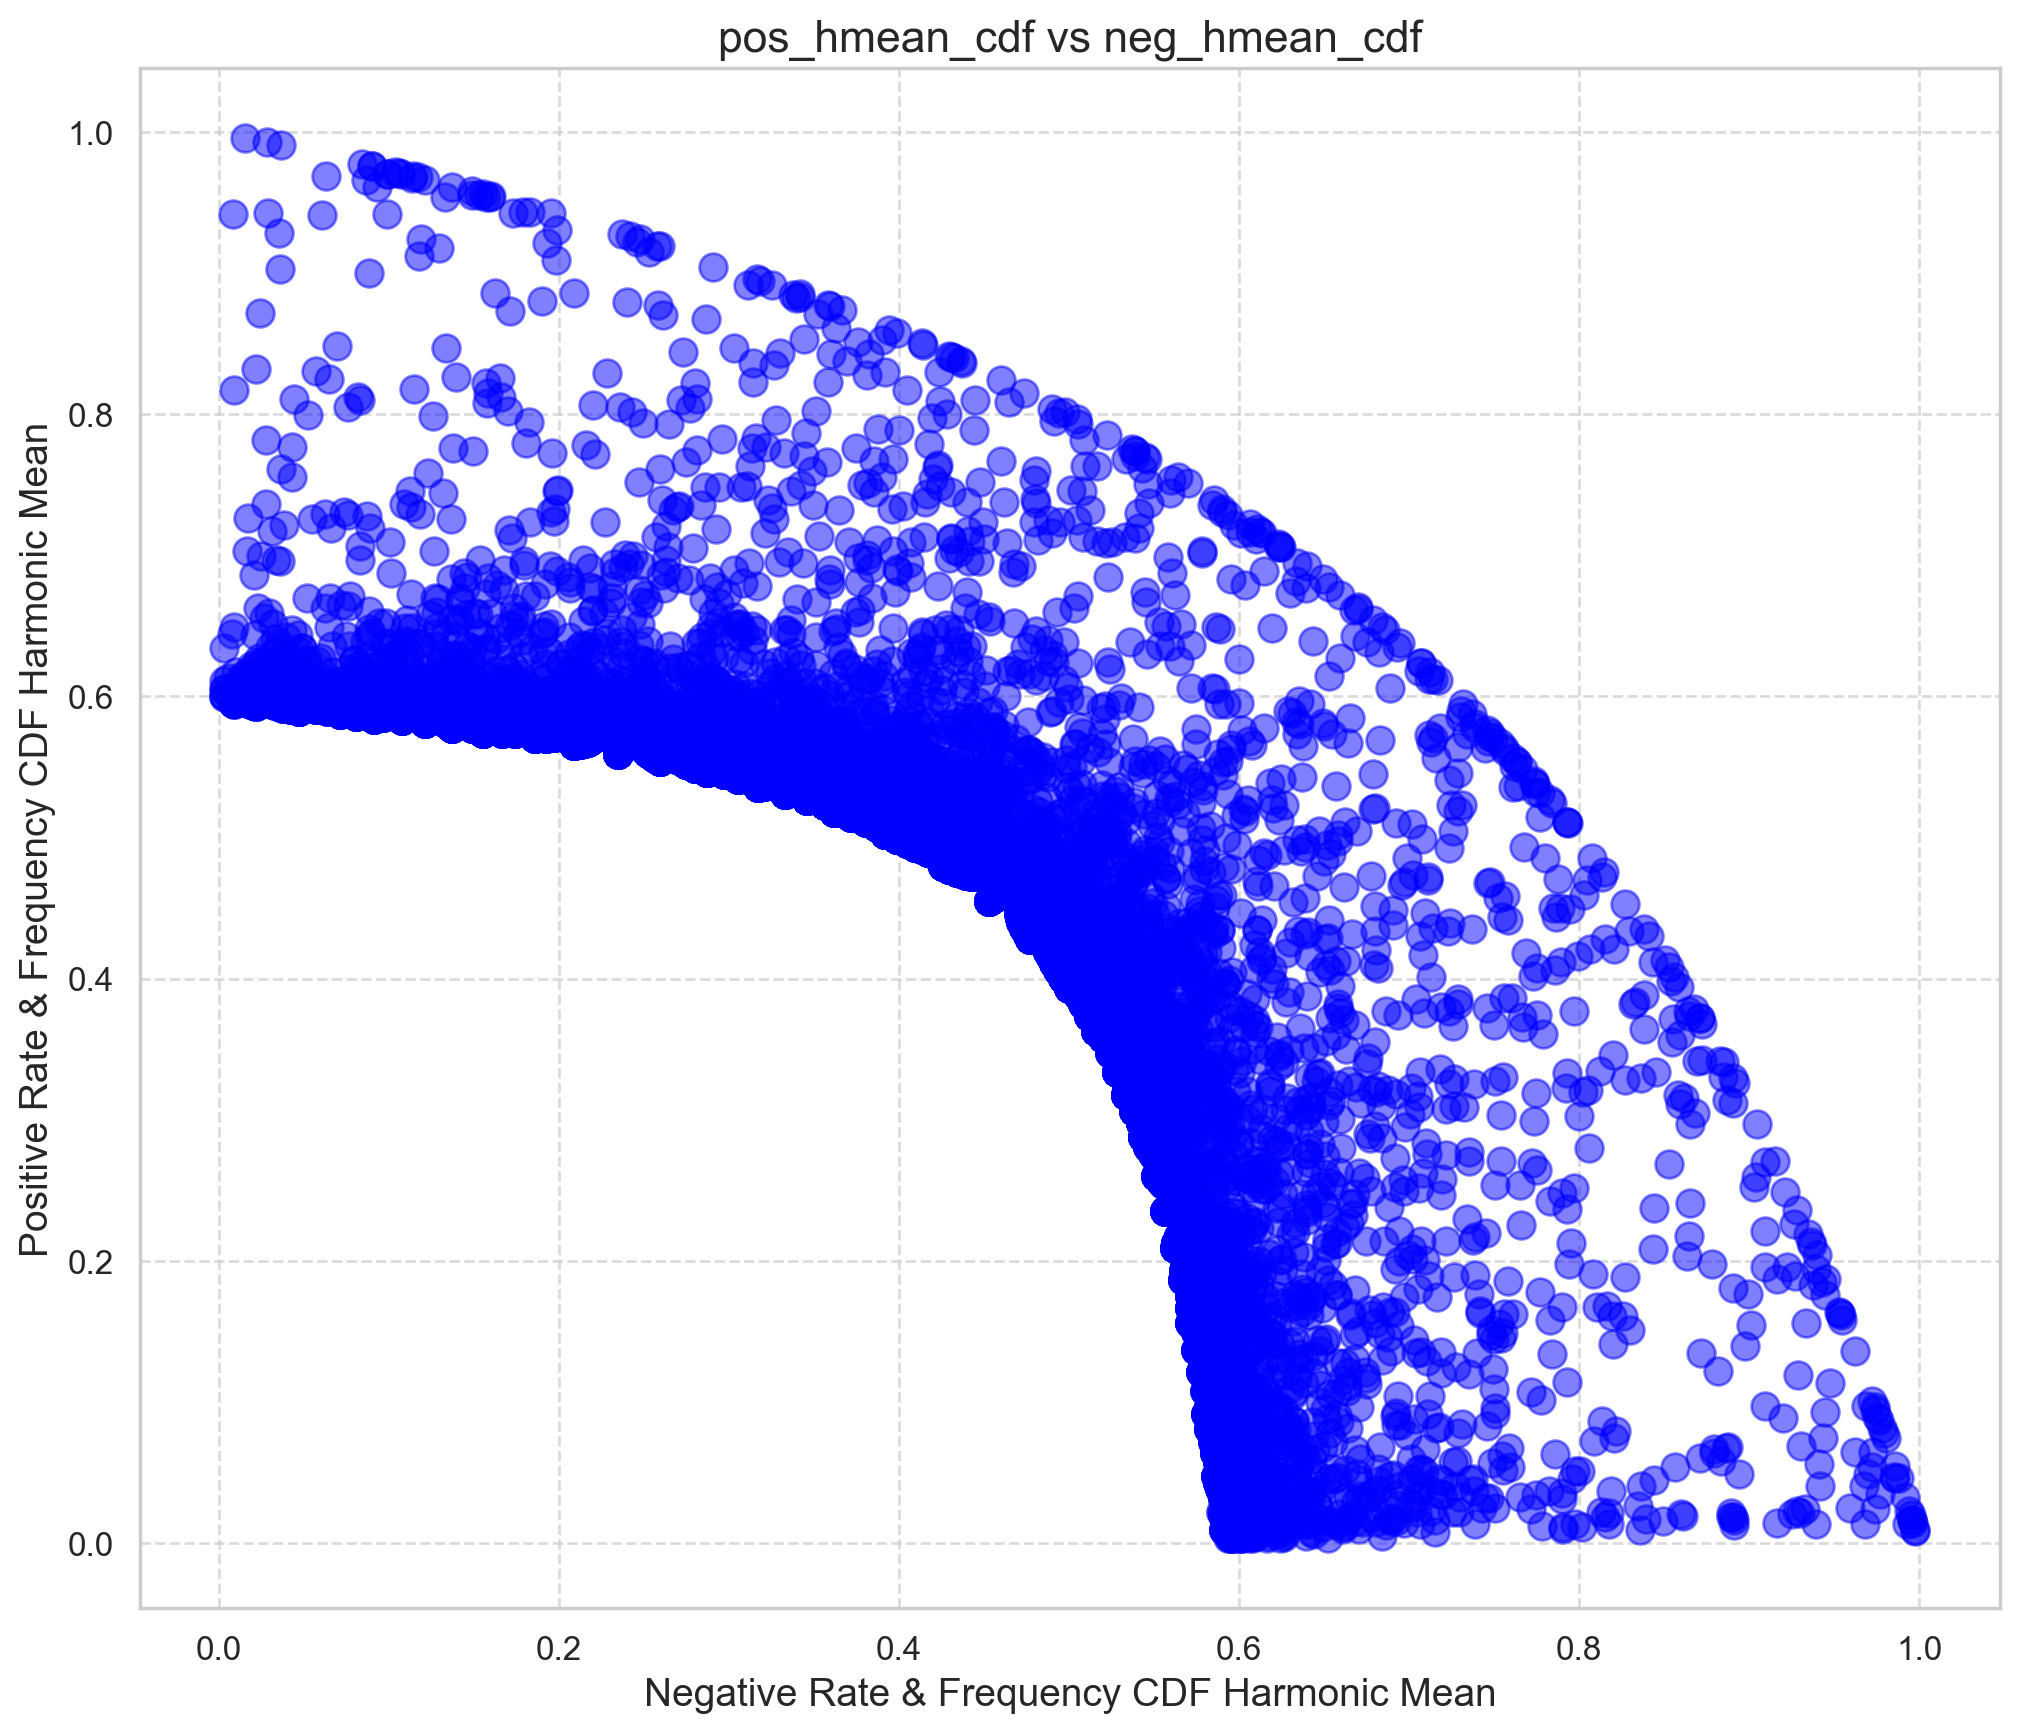

In [48]:
# Set the style
sns.set(style="whitegrid")

# Create a figure and axes
plt.figure(figsize=(12, 10))
ax = sns.regplot(x='neg_hmean_cdf', y='pos_hmean_cdf', data=term_freq_df, fit_reg=False, color='blue', scatter_kws={'alpha':0.5, 's':100})

# Add a title
plt.title("pos_hmean_cdf vs neg_hmean_cdf", fontsize=16)

# Customize axes labels
plt.xlabel("Negative Rate & Frequency CDF Harmonic Mean", fontsize=14)
plt.ylabel("Positive Rate & Frequency CDF Harmonic Mean", fontsize=14)

# Increase tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()